In [1]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [4]:
config = {}

config['camera'] = "03"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"

## experiment 1
config['date1'] = "2024-05-02"
config['date2'] = "2024-05-07"


In [5]:
mlti = __load_mlti(config['date1'], config['date2'], "Z", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [6]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [7]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-05-02
2024-05-03
2024-05-04
2024-05-05
2024-05-06
2024-05-07


In [8]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-05-02T16:38:04.000000Z,538.739459,384.381760,538.0,384.0,225.688085,148.708659,143.059429,-0.336829,9.093702,0.000364,0.000343,0.000846,0.000393,0.000427,0.000006,0.000035,0.0
1,2024-05-02T16:52:03.000000Z,538.765065,384.379934,538.0,384.0,225.483037,148.736898,143.065050,-0.334208,9.111719,0.000364,0.000342,0.000844,0.000393,0.000427,0.000005,0.000035,839.0
2,2024-05-02T16:54:04.000000Z,538.766148,384.374081,538.0,384.0,225.599314,148.730156,143.075383,-0.333376,9.097124,0.000363,0.000342,0.000844,0.000393,0.000426,0.000006,0.000035,960.0
3,2024-05-02T16:59:04.000000Z,538.767096,384.344131,538.0,384.0,225.371423,148.741025,143.068472,-0.333641,9.268784,0.000363,0.000342,0.000842,0.000392,0.000426,0.000005,0.000035,1260.0
4,2024-05-02T17:09:04.000000Z,538.792471,384.298079,538.0,384.0,225.396038,148.738290,143.060298,-0.332546,9.303052,0.000363,0.000342,0.000842,0.000393,0.000426,0.000005,0.000035,1860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2024-05-07T23:42:04.000000Z,545.924054,392.654925,545.0,392.0,141.413466,147.647361,142.211585,-0.437768,8.127997,0.000484,0.000461,0.000450,0.000526,0.000569,0.000008,0.000018,457440.0
750,2024-05-07T23:44:04.000000Z,545.943358,392.651937,546.0,392.0,141.331000,147.640843,142.194083,-0.438478,8.259876,0.000484,0.000462,0.000450,0.000526,0.000569,0.000008,0.000019,457560.0
751,2024-05-07T23:45:04.000000Z,545.940467,392.660802,546.0,392.0,141.458707,147.649843,142.194188,-0.437401,8.287743,0.000484,0.000462,0.000451,0.000526,0.000570,0.000008,0.000019,457620.0
752,2024-05-07T23:54:04.000000Z,545.625911,392.697511,545.0,392.0,64.606336,-146.987208,-141.749935,12.109652,3.391646,0.000535,0.000512,0.000105,0.000582,0.000628,0.000010,0.000004,458160.0


### Remove MLTI times

In [9]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


In [10]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan
0,2024-05-02T16:38:04.000000Z,2.855319,2.037223,2.8514,2.0352,225.688085,148.708659,143.059429,-0.336829,9.093702,...,0.000343,0.000846,0.000393,0.000427,0.000006,0.000035,0.0,2024-05-02T15:38:04.000000Z,NaN,NaN
1,2024-05-02T16:52:03.000000Z,2.855455,2.037214,2.8514,2.0352,225.483037,148.736898,143.065050,-0.334208,9.111719,...,0.000342,0.000844,0.000393,0.000427,0.000005,0.000035,839.0,2024-05-02T15:52:03.000000Z,NaN,NaN
2,2024-05-02T16:54:04.000000Z,2.855461,2.037183,2.8514,2.0352,225.599314,148.730156,143.075383,-0.333376,9.097124,...,0.000342,0.000844,0.000393,0.000426,0.000006,0.000035,960.0,2024-05-02T15:54:04.000000Z,NaN,NaN
3,2024-05-02T16:59:04.000000Z,2.855466,2.037024,2.8514,2.0352,225.371423,148.741025,143.068472,-0.333641,9.268784,...,0.000342,0.000842,0.000392,0.000426,0.000005,0.000035,1260.0,2024-05-02T15:59:04.000000Z,NaN,NaN
4,2024-05-02T17:09:04.000000Z,2.855600,2.036780,2.8514,2.0352,225.396038,148.738290,143.060298,-0.332546,9.303052,...,0.000342,0.000842,0.000393,0.000426,0.000005,0.000035,1860.0,2024-05-02T16:09:04.000000Z,2.0352,2.8514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2024-05-07T23:42:04.000000Z,2.893397,2.081071,2.8885,2.0776,141.413466,147.647361,142.211585,-0.437768,8.127997,...,0.000461,0.000450,0.000526,0.000569,0.000008,0.000018,457440.0,2024-05-07T22:42:04.000000Z,2.0776,2.8885
750,2024-05-07T23:44:04.000000Z,2.893500,2.081055,2.8938,2.0776,141.331000,147.640843,142.194083,-0.438478,8.259876,...,0.000462,0.000450,0.000526,0.000569,0.000008,0.000019,457560.0,2024-05-07T22:44:04.000000Z,2.0776,2.8938
751,2024-05-07T23:45:04.000000Z,2.893484,2.081102,2.8938,2.0776,141.458707,147.649843,142.194188,-0.437401,8.287743,...,0.000462,0.000451,0.000526,0.000570,0.000008,0.000019,457620.0,2024-05-07T22:45:04.000000Z,2.0776,2.8938
752,2024-05-07T23:54:04.000000Z,2.891817,2.081297,2.8885,2.0776,64.606336,-146.987208,-141.749935,12.109652,3.391646,...,0.000512,0.000105,0.000582,0.000628,0.000010,0.000004,458160.0,2024-05-07T22:54:04.000000Z,2.0776,2.8885


### Remove artefacts

In [11]:
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 50]

### Plotting

In [12]:
from functions.reduce import __reduce

In [13]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

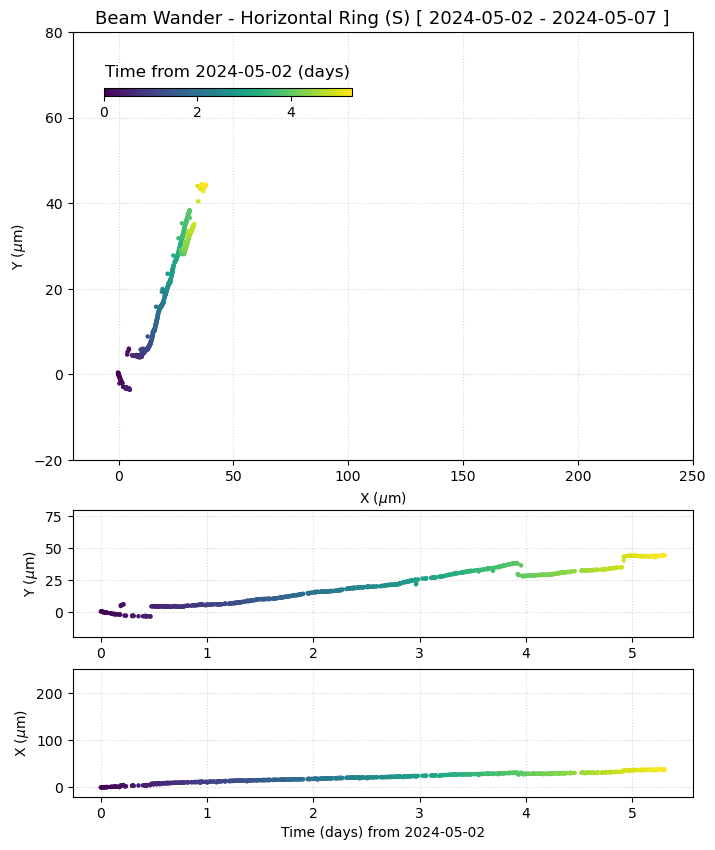

In [14]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -20, 250
    y1, y2 = -20, 80
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(y1, y2)
    ax2.set_ylim(y1, y2)
    ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - Horizontal Ring (S) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


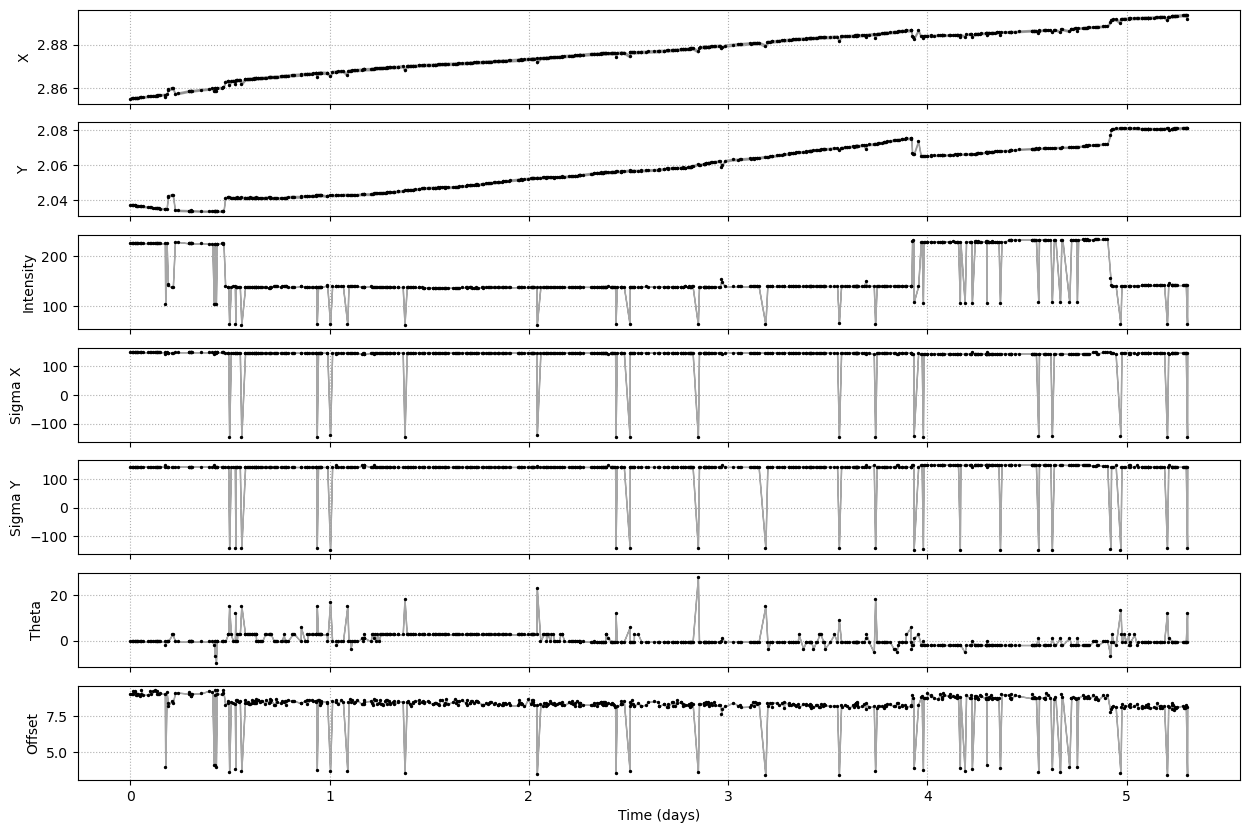

In [15]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')
